In [67]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt

In [68]:
# Section
a = -1
b = 2

# Additional data
epsilon = 1e-6
populationSize = 100

# Iterations 
t_max_i = 20
t_max = 200

# Propabilities
probCrossover = 0.6
probMutation = 0.02

In [69]:
def f(x):
    return x * math.sin(10 * math.pi * x) + 1

In [70]:
def getBitArraySize(n):
    bitArraySize = 0
    
    while n > 0:
        n >>= 1
        bitArraySize += 1
        
    return bitArraySize

In [71]:
def bitToFloat(bitArray):
    return a + ((b - a)) / (2**bitArraySize - 1) * int(bitArray, 2)

def fitness(individual):
    return f(bitToFloat(individual))

In [72]:
def tournamentMethod(population):
    result = random.sample(population, 2)

    firstFitnessFunction = fitness(result[0])
    secondFitnessFunction = fitness(result[1])

    if firstFitnessFunction > secondFitnessFunction:
        best = result[0]
    else:
        best = result[1]  

    return best

def mutation(individual):
    randomProbability = np.random.random_sample()

    if randomProbability <= probMutation:
        charIndexToMutate = np.random.randint(low = 0, high = bitArraySize)
        charToMutate = individual[charIndexToMutate] 

        if charToMutate == '0':
            individual = individual[:charIndexToMutate] + "1" + individual[charIndexToMutate + 1:]
        else:
            individual = individual[:charIndexToMutate] + "0" + individual[charIndexToMutate + 1:]

    return individual

def crossover(population, propability):    
    individualOne = population[np.random.randint(low = 0, high = populationSize - 1)]
    individualTwo = population[np.random.randint(low = 0, high = populationSize - 1)]

    probabilityForCrossover = np.random.random_sample()
    if probabilityForCrossover <= propability:
        randomIndex = np.random.randint(low = 0, high = bitArraySize)

        firstHalf_IndividualOne = individualOne[:randomIndex]
        secondHalf_IndividualOne = individualOne[randomIndex:]

        firstHalf_IndividualTwo = individualTwo[:randomIndex]
        secondHalf_IndividualTwo = individualTwo[randomIndex:]

        crossovered = firstHalf_IndividualOne + secondHalf_IndividualTwo
        crossovered = firstHalf_IndividualTwo + secondHalf_IndividualOne
    else:
        crossovered = individualOne
        crossovered = individualTwo
            
    return crossovered

In [73]:
def applyTournamentForPopulation(population):
    newPopulation = []
    
    while len(newPopulation) < populationSize:
        best = tournamentMethod(population) 
        newPopulation.append(best)
    
    return newPopulation

def mutatePopulation(population):
    newPopulation = []
    
    for individual in population:
        mutatedIndividual = mutation(individual)
        newPopulation.append(mutatedIndividual)

    return newPopulation
        
def crossoverPopulation(population, propability):    
    newPopulation = []
    
    while len(newPopulation) < populationSize:
        crossoveredIndividuals = crossover(population, propability)
        newPopulation.append(crossoveredIndividuals)
            
    return newPopulation

1.8510315063074843


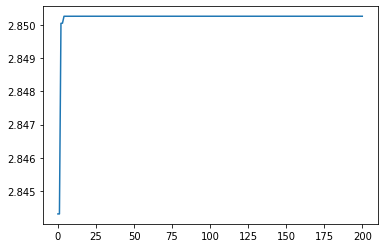

In [77]:
initialPopulation = []
population = []

n = (int)((b - a) / epsilon)
bitArraySize = getBitArraySize(n)

for i in range(populationSize):
    initialPopulation += [np.random.randint(2, size = (bitArraySize,))]
    
for i in range(populationSize):
    population.append("".join(str(x) for x in initialPopulation[i]))

q = []
e = []

best = []
bestX = []
i = 0
while i <= t_max:
    population = applyTournamentForPopulation(population)
    population = mutatePopulation(population)
    population = crossoverPopulation(population, probCrossover)

    fitnesses = []
    for individual in population:
        populationFitness = fitness(individual)
        bestX.append(individual)
        fitnesses.append(populationFitness)
    best.append(max(fitnesses))

    if i > 1:
        #print('\nf_max = ', best[i])
        if best[i] - best[i - 1] < epsilon:
            t_max_i += 1

    if t_max_i > t_max_i:
        break

    q.append(i)
    e.append(best[i])

    i += 1    

print(bitToFloat(bestX[i - 1]))
plt.plot(q,e)

[2.850273764374812, 2.850273764374812, 2.850273764374812, 2.850273764374812, 2.850273764374812, 2.850273764374812, 2.850273764374812, 2.850273764374812, 2.850273764374812, 2.850273764374812]
[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9]


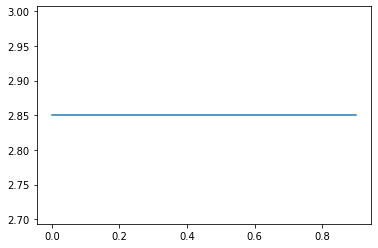

In [75]:
probs = []
res = []

for p in np.arange(0, 1, 0.1):
    #print('\n-----', p, '-----')
    best = []
    i = 0
    max_i = 0
    while i <= t_max:
        population = applyTournamentForPopulation(population)
        population = mutatePopulation(population)
        population = crossoverPopulation(population, p)

        fitnesses = []
        for individual in population:
            populationFitness = fitness(individual)
            fitnesses.append(populationFitness)
        best.append(max(fitnesses))

        if i > 1:
            #print('\nf_max = ', best[i])
            if best[i] - best[i - 1] < epsilon:
                max_i += 1

        if max_i > t_max_i:
            break

        i += 1 
    probs.append(p)
    res.append(best[i - 1])
    
    #print('p = ', p)
    #print('f = ', best[i - 1])
    
plt.plot(probs, res)
print(res)
print(probs)